# Imbalanced Data

In [1]:
# https://www.openml.org/d/1220
# https://www.openml.org/d/1241
# https://www.openml.org/d/37
# https://www.openml.org/d/44
from sklearn.datasets import fetch_openml

data = fetch_openml(data_id=1220)

In [2]:
data['DESCR']

"**Author**: Tencent Inc.  \n**Source**: [KDD Cup](https://www.kddcup2012.org/) - 2012  \n**Please cite**:   \n\n**0.1% balanced subsample of the original KDD dataset**  \n\nThis data is derived from the 2012 KDD Cup. The data is subsampled to 0.1% of the original number of instances, downsampling the majority class (click=0) so that the target feature is reasonably balanced (5 to 1).\n\nThe data is about advertisements shown alongside search results in a search engine, and whether or not people clicked on these ads. \nThe task is to build the best possible model to predict whether a user will click on a given ad.\n\nA search session contains information on user id, the query issued by the user, ads displayed to the user, and target feature indicating whether a user clicked at least one of the ads in this session. The number of ads displayed to a user in a session is called ‘depth’. The order of an ad in the displayed list is called ‘position’.  An ad is displayed as a short text calle

In [3]:
df = pd.DataFrame(
    data['data'],
    columns=data['feature_names']
).astype(float)

df['target'] = pd.Series(data['target']).astype(int) 

In [4]:
df.sample(n=5, random_state=42)

,impression,ad_id,advertiser_id,depth,position,keyword_id,title_id,description_id,user_id,target
12831,1.0,20884487.0,22234.0,1.0,1.0,19303.0,83270.0,74248.0,70.0,0
34147,29.0,10593104.0,1268.0,2.0,1.0,3275.0,2136.0,128.0,0.0,1
7656,1.0,21319021.0,20551.0,2.0,2.0,4766.0,15510.0,15125.0,11569401.0,0
8659,1.0,3831882.0,27486.0,2.0,1.0,1007.0,2869.0,387.0,12581245.0,0
17460,1.0,21442048.0,37039.0,3.0,1.0,35349.0,399482.0,328000.0,0.0,0


In [5]:
df.corr()

,impression,ad_id,advertiser_id,depth,position,keyword_id,title_id,description_id,user_id,target
impression,1.000000,-0.008946,0.000056,0.006966,0.005456,-0.003067,-0.003515,-0.003542,-0.009740,0.023876
ad_id,-0.008946,1.000000,0.329384,0.055689,0.035880,0.010548,0.056440,0.043192,-0.011958,-0.015202
advertiser_id,0.000056,0.329384,1.000000,0.034990,0.022872,-0.058575,-0.001850,-0.005917,0.025834,-0.027146
depth,0.006966,0.055689,0.034990,1.000000,0.548731,0.014689,0.092812,0.079156,-0.258668,-0.053392
position,0.005456,0.035880,0.022872,0.548731,1.000000,-0.000391,0.055589,0.050941,-0.154612,-0.123688
keyword_id,-0.003067,0.010548,-0.058575,0.014689,-0.000391,1.000000,0.703213,0.604124,-0.092058,0.027127
title_id,-0.003515,0.056440,-0.001850,0.092812,0.055589,0.703213,1.000000,0.803911,-0.120390,0.012609
description_id,-0.003542,0.043192,-0.005917,0.079156,0.050941,0.604124,0.803911,1.000000,-0.107920,0.004623
user_id,-0.009740,-0.011958,0.025834,-0.258668,-0.154612,-0.092058,-0.120390,-0.107920,1.000000,0.078729
target,0.023876,-0.015202,-0.027146,-0.053392,-0.123688,0.027127,0.012609,0.004623,0.078729,1.000000


In [6]:
for feature in data['feature_names']:
    print(
        'Cardinality of {}: {:,}'.format(
            feature, df[feature].value_counts().shape[0]
        )
    )

Cardinality of impression: 99
Cardinality of ad_id: 19,228
Cardinality of advertiser_id: 6,064
Cardinality of depth: 3
Cardinality of position: 3
Cardinality of keyword_id: 19,803
Cardinality of title_id: 25,321
Cardinality of description_id: 22,381
Cardinality of user_id: 30,114


In [7]:
df['target'].mean()

0.16841894462801643

In [8]:
feature_names = data['feature_names']

x = df[feature_names]
y = df['target']

In [9]:
x.shape

(39948, 9)

In [10]:
print(f'% of Positive Class = {y.mean():.2%}') 

% of Positive Class = 16.84%


In [11]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39948 entries, 0 to 39947
Data columns (total 9 columns):
impression        39948 non-null float64
ad_id             39948 non-null float64
advertiser_id     39948 non-null float64
depth             39948 non-null float64
position          39948 non-null float64
keyword_id        39948 non-null float64
title_id          39948 non-null float64
description_id    39948 non-null float64
user_id           39948 non-null float64
dtypes: float64(9)
memory usage: 2.7 MB


# Metrics

In chapter 8, we use the true positive rates (TPR) and false positive rates (FPR) to draw the area under the curve to evaluate a classifier over different thresholds. This is specially useful when dealing with imbalanced data sets. We have also learned about the true negative (TNR), which is basicallty 1 minus FPR.

Geometric Mean Score: For binary classification problems, the geometric mean corresponds to the square root of the product of the sensitivity (TPR) and specificity (TNR). Combining the two metrics tries to maximize the accuracy on each of the classes while keeping these accuracies balanced.

In [12]:
from imblearn.metrics import geometric_mean_score

# Data Preparation

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [14]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score
from imblearn.metrics import geometric_mean_score


def predict_and_evalutate(x_train, y_train, x_test, y_test, sample_weight=None, title='Unweighted'):
    
    
    clf = Pipeline(
        [
            ('Embedder', RandomTreesEmbedding(n_estimators=10, max_leaf_nodes=20, random_state=42)), 
            ('Sclaer', MaxAbsScaler()),
            ('Classifier', LogisticRegression(solver='saga', max_iter=1000, random_state=42))
        ]
    )
    clf.fit(x_train, y_train, Classifier__sample_weight=sample_weight)
    y_test_pred = clf.predict(x_test)
    
    print(
        'Precision: {:.02%}, Recall: {:.02%}; G-mean: {:.02%} @  {}'.format(
            precision_score(y_test, y_test_pred),
            recall_score(y_test, y_test_pred),
            geometric_mean_score(y_test, y_test_pred),
            title
        )
    )
    
    return clf

In [31]:
def calculate_feature_coeff(clf):
    return pd.DataFrame(
        {
            'Features': [
                f'EmbFeature{e}' 
                for e in range(len(clf[-1].coef_[0]))
            ] + ['Intercept'],
            'Coeff': list(
                clf[-1].coef_[0]
            ) + [clf[-1].intercept_[0]]
        }

    ).set_index('Features').tail(10)

In [32]:
clf = predict_and_evalutate(x_train, y_train, x_test, y_test)

Precision: 62.50%, Recall: 0.30%; G-mean: 5.45% @  Unweighted


In [35]:
calculate_feature_coeff(clf)

,Coeff
Features,
EmbFeature187,0.090000
EmbFeature188,-1.180000
EmbFeature189,-0.170000
EmbFeature190,0.370000
EmbFeature191,0.370000
EmbFeature192,0.600000
EmbFeature193,-0.920000
EmbFeature194,-0.240000
EmbFeature195,-0.130000


## Sample Weights

In [36]:
(1 - y_train.mean()) / y_train.mean() 

4.937574316290131

In [37]:
weight_options = [1, 2, 5]

In [38]:
sample_weight = (1 * (y_train == 0)) + (2 * (y_train == 1))

clf = predict_and_evalutate(x_train, y_train, x_test, y_test, sample_weight=sample_weight)

Precision: 36.36%, Recall: 2.14%; G-mean: 14.57% @  Unweighted


In [39]:
calculate_featur_coeff(clf)

,Coeff
Features,
EmbFeature187,0.171856
EmbFeature188,-1.372995
EmbFeature189,-0.257479
EmbFeature190,0.453752
EmbFeature191,0.438845
EmbFeature192,0.755228
EmbFeature193,-0.884646
EmbFeature194,-0.201870
EmbFeature195,-0.179835


In [40]:
sample_weight = (1 * (y_train == 0)) + (5 * (y_train == 1))

clf = predict_and_evalutate(x_train, y_train, x_test, y_test, sample_weight=sample_weight, title='Unweighted')

Precision: 24.78%, Recall: 13.38%; G-mean: 35.04% @  Unweighted


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [41]:
calculate_feature_coeff(clf).round(2).style.bar(
    subset='Coeff', 
    color='#999',
    align='zero'
)

,Coeff
Features,
EmbFeature187,0.44
EmbFeature188,-1.54
EmbFeature189,-0.43
EmbFeature190,0.6
EmbFeature191,0.51
EmbFeature192,0.87
EmbFeature193,-0.93
EmbFeature194,-0.15
EmbFeature195,-0.29


In [42]:
df_coef_list = []

for w in weight_options:
    
    print(f'\nMinority Class (Positive Class) Weight = Weight x {w}')
    sample_weight = (1 * (y_train == 0)) + (w * (y_train == 1))
    clf = predict_and_evalutate(x_train, y_train, x_test, y_test, sample_weight=sample_weight)
    df_coef = calculate_featur_coeff(clf)
    df_coef = df_coef.rename(columns={'Coeff': f'Coeff [w={w}]'})
    df_coef_list.append(df_coef)


Minority Class (Positive Class) Weight = Weight x 1
Precision: 62.50%, Recall: 0.30%; G-mean: 5.45% @  Unweighted

Minority Class (Positive Class) Weight = Weight x 2
Precision: 36.36%, Recall: 2.14%; G-mean: 14.57% @  Unweighted

Minority Class (Positive Class) Weight = Weight x 5
Precision: 24.78%, Recall: 13.38%; G-mean: 35.04% @  Unweighted


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [43]:
pd.concat(df_coef_list, axis=1).round(2).style.bar(
    subset=[f'Coeff [w={w}]' for w in weight_options], 
    color='#999',
    align='zero'
)

,Coeff [w=1],Coeff [w=2],Coeff [w=5]
Features,,,
EmbFeature187,0.09,0.17,0.44
EmbFeature188,-1.18,-1.37,-1.54
EmbFeature189,-0.17,-0.26,-0.43
EmbFeature190,0.37,0.45,0.6
EmbFeature191,0.37,0.44,0.51
EmbFeature192,0.6,0.76,0.87
EmbFeature193,-0.92,-0.88,-0.93
EmbFeature194,-0.24,-0.2,-0.15
EmbFeature195,-0.13,-0.18,-0.29


In [44]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y, y_proba, ax, label):
    fpr, tpr, thr = roc_curve(y, y_proba)
    auc_value = auc(fpr, tpr)
    pd.DataFrame(
        {
            'FPR': fpr,
            'TPR': tpr
        }
    ).set_index('FPR')['TPR'].plot(
        label=label + f'; AUC = {auc_value:.3f}',
        kind='line',
        xlim=(0,1),
        ylim=(0,1),
        color='k',
        ax=ax
    )
    return (fpr, tpr, auc_value)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


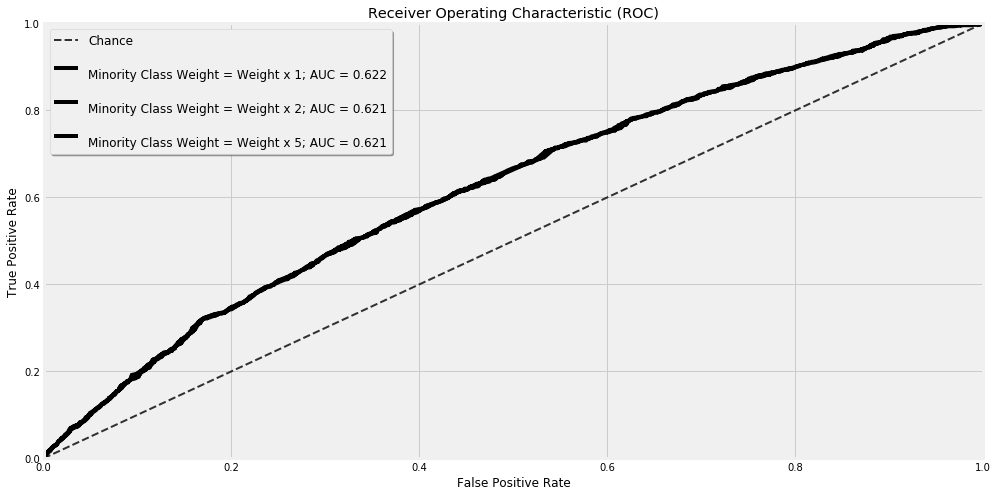

In [45]:
from sklearn.metrics import roc_curve, auc

fig, ax = plt.subplots(1, 1, figsize=(15, 8), sharey=False)

ax.plot(
    [0, 1], [0, 1], 
    linestyle='--', 
    lw=2, color='k',
    label='Chance', alpha=.8
)

for w in weight_options:

    sample_weight = (1 * (y_train == 0)) + (w * (y_train == 1))
    
    clf = Pipeline(
        [
            ('Embedder', RandomTreesEmbedding(n_estimators=20, max_leaf_nodes=20, random_state=42)), 
            ('Sclaer', MaxAbsScaler()),
            ('Classifier', LogisticRegression(solver='lbfgs', max_iter=2000, random_state=42))
        ]
    )
    clf.fit(x_train, y_train, Classifier__sample_weight=sample_weight)
    y_test_pred_proba = clf.predict_proba(x_test)[:,1]

    plot_roc_curve(
        y_test, y_test_pred_proba, 
        label=f'\nMinority Class Weight = Weight x {w}',
        ax=ax
    ) 

ax.set_title('Receiver Operating Characteristic (ROC)')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

ax.legend(ncol=1, fontsize='large', shadow=True)

fig.show()

# Imbalanced Learn

In [46]:
# Install
# https://imbalanced-learn.org/stable/install.html
# pip install -U imbalanced-learn

In [738]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.pipeline import Pipeline

def sample_and_predict(x_train, y_train, x_test, y_test, sampler=None):
    
    if sampler:
        x_train, y_train = sampler.fit_resample(x_train, y_train)
    
    clf = Pipeline(
        [
            ('Embedder', RandomTreesEmbedding(n_estimators=10, max_leaf_nodes=20, random_state=42)), 
            ('Sclaer', MaxAbsScaler()),
            ('Classifier', LogisticRegression(solver='lbfgs', max_iter=2000, random_state=42))
        ]
    )
    clf.fit(x_train, y_train)
    y_test_pred_proba = clf.predict_proba(x_test)[:,1]
    
    return y_test, y_test_pred_proba

# Under-Sampling

## Random Under-Sampling

In [680]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

x_train_resampled, y_train_resampled = rus.fit_resample(x_train, y_train)

print(f'% of Positive Class = {y_train_resampled.mean():.2%}') 

% of Positive Class = 50.00%


In [681]:
clf = predict_and_evalutate(x_train_resampled, y_train_resampled, x_test, y_test, title='Random Under Sampler')

Precision: 23%, Recall: 55%; G-mean: 59% @  Random Under Sampler


In [682]:
calculate_featur_coeff(clf).style.bar(subset=['Coeff'], color='#999', align='mid')

,Coeff
Features,
EmbFeature187,0.53487
EmbFeature188,-0.848425
EmbFeature189,-0.636115
EmbFeature190,-0.526081
EmbFeature191,-0.804067
EmbFeature192,0.912993
EmbFeature193,0.647804
EmbFeature194,-0.541752
EmbFeature195,-0.276868


## NearMiss

In [734]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(n_neighbors=3)

x_train_resampled, y_train_resampled = nm.fit_resample(x_train, y_train)

print(f'% of Positive Class = {y_train_resampled.mean():.2%}') 

% of Positive Class = 50.00%


In [411]:
clf = predict_and_evalutate(x_train_resampled, y_train_resampled, x_test, y_test, title='Near Miss K=3')

Precision: 19%, Recall: 73%; G-mean: 51% @  Near Miss K=3


In [412]:
calculate_featur_coeff(clf).style.bar(subset=['Coeff'], color='#999', align='mid')

,Coeff
Features,
impression,4.48056
ad_id,-0.25684
advertiser_id,-0.113888
depth,0.104189
position,-0.373302
keyword_id,1.84463
title_id,4.99325
description_id,1.39319
user_id,3.60338


In [413]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(n_neighbors=11)

x_train_resampled, y_train_resampled = nm.fit_resample(x_train, y_train)

print(f'% of Positive Class = {y_train_resampled.mean():.2%}') 

% of Positive Class = 50.00%


In [414]:
clf = predict_and_evalutate(x_train_resampled, y_train_resampled, x_test, y_test, title='Near Miss K=11')

Precision: 19%, Recall: 76%; G-mean: 50% @  Near Miss K=11


In [745]:
from imblearn.under_sampling import EditedNearestNeighbours

enn = EditedNearestNeighbours(n_neighbors=5)
x_train_resampled, y_train_resampled = enn.fit_resample(x_train, y_train)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


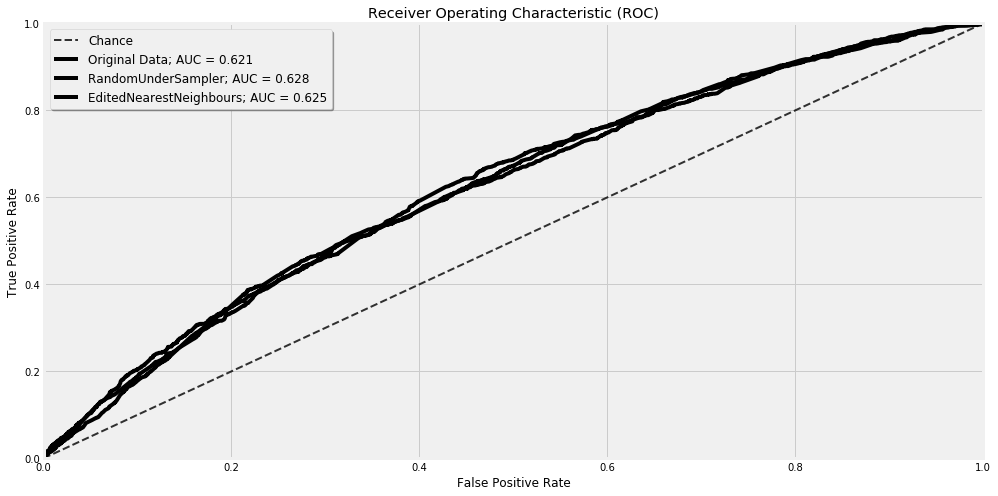

In [744]:
from sklearn.metrics import roc_curve, auc
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import EditedNearestNeighbours

fig, ax = plt.subplots(1, 1, figsize=(15, 8), sharey=False)

ax.plot(
    [0, 1], [0, 1], 
    linestyle='--', 
    lw=2, color='k',
    label='Chance', alpha=.8
)

# Original Data

y_test, y_test_pred_proba = sample_and_predict(x_train, y_train, x_test, y_test, sampler=None)

plot_roc_curve(
    y_test, y_test_pred_proba, 
    label='Original Data',
    ax=ax
) 


# RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

y_test, y_test_pred_proba = sample_and_predict(x_train, y_train, x_test, y_test, sampler=rus)

plot_roc_curve(
    y_test, y_test_pred_proba, 
    label='RandomUnderSampler',
    ax=ax
) 

# EditedNearestNeighbours

nc = EditedNearestNeighbours(n_neighbors=5)

y_test, y_test_pred_proba = sample_and_predict(x_train, y_train, x_test, y_test, sampler=nc)

plot_roc_curve(
    y_test, y_test_pred_proba, 
    label='EditedNearestNeighbours',
    ax=ax
) 


ax.set_title(f'Receiver Operating Characteristic (ROC)')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

ax.legend(ncol=1, fontsize='large', shadow=True)

fig.show()

In [ ]:
# from imblearn.under_sampling import ClusterCentroids

# cc = ClusterCentroids()
# x_train_resampled, y_train_resampled = cc.fit_resample(x_train, y_train)

# Over Sampling

## Random Over-Sampling

In [519]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)

print(f'% of Positive Class = {y_train_resampled.mean():.2%}') 

% of Positive Class = 50.00%


In [520]:
clf = predict_and_evalutate(x_train_resampled, y_train_resampled, x_test, y_test, title='Random Over Sampler')

Precision: 22%, Recall: 64%; G-mean: 59% @  Random Over Sampler


## SMOTE

In [417]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)

x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print(f'% of Positive Class = {y_train_resampled.mean():.2%}') 

% of Positive Class = 50.00%


In [418]:
predict_and_evalutate(x_train_resampled, y_train_resampled, x_test, y_test, title='SMOTE')

Precision: 22%, Recall: 67%; G-mean: 58% @  SMOTE


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [419]:
from imblearn.over_sampling import BorderlineSMOTE
    
bsmote = BorderlineSMOTE(random_state=0)

x_train_resampled, y_train_resampled = bsmote.fit_resample(x_train, y_train)

print(f'% of Positive Class = {y_train_resampled.mean():.2%}') 

% of Positive Class = 50.00%


In [420]:
predict_and_evalutate(x_train_resampled, y_train_resampled, x_test, y_test, title='Borderline SMOTE')

Precision: 22%, Recall: 66%; G-mean: 59% @  Borderline SMOTE


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:46: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


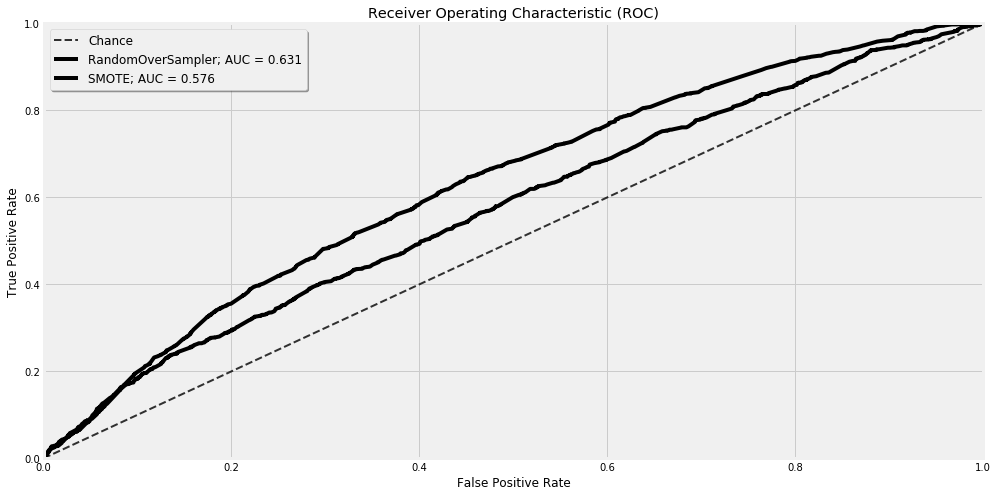

In [750]:
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

fig, ax = plt.subplots(1, 1, figsize=(15, 8), sharey=False)

ax.plot(
    [0, 1], [0, 1], 
    linestyle='--', 
    lw=2, color='k',
    label='Chance', alpha=.8
)


# RandomOverSampler

ros = RandomOverSampler(random_state=42)

y_test, y_test_pred_proba = sample_and_predict(x_train, y_train, x_test, y_test, sampler=ros)

plot_roc_curve(
    y_test, y_test_pred_proba, 
    label='RandomOverSampler',
    ax=ax
)

# SMOTE 

smote = SMOTE(random_state=42)

y_test, y_test_pred_proba = sample_and_predict(x_train, y_train, x_test, y_test, sampler=smote)

plot_roc_curve(
    y_test, y_test_pred_proba, 
    label='SMOTE',
    ax=ax
) 

ax.set_title(f'Receiver Operating Characteristic (ROC)')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

ax.legend(ncol=1, fontsize='large', shadow=True)

fig.show()

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


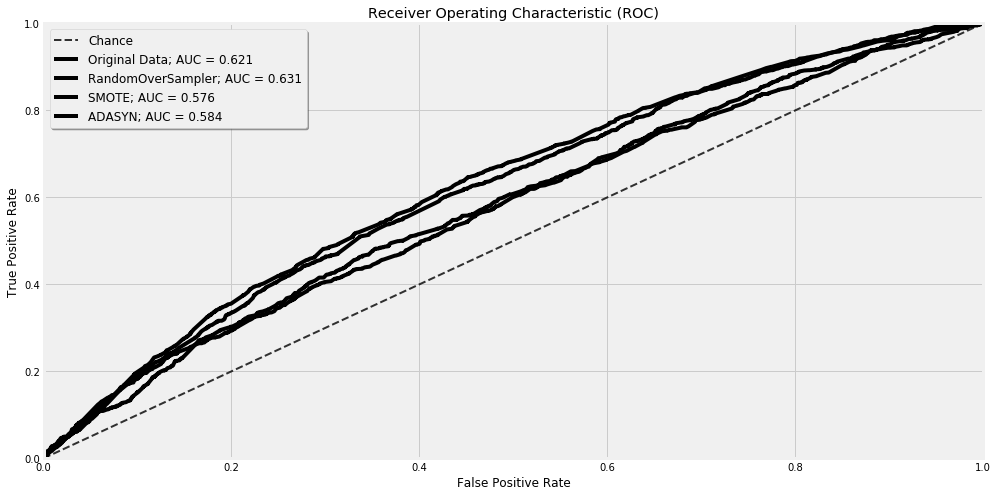

In [749]:
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

fig, ax = plt.subplots(1, 1, figsize=(15, 8), sharey=False)

ax.plot(
    [0, 1], [0, 1], 
    linestyle='--', 
    lw=2, color='k',
    label='Chance', alpha=.8
)

# Original Data

y_test, y_test_pred_proba = sample_and_predict(x_train, y_train, x_test, y_test, sampler=None)

plot_roc_curve(
    y_test, y_test_pred_proba, 
    label='Original Data',
    ax=ax
) 

# RandomOverSampler

ros = RandomOverSampler(random_state=42)

y_test, y_test_pred_proba = sample_and_predict(x_train, y_train, x_test, y_test, sampler=ros)

plot_roc_curve(
    y_test, y_test_pred_proba, 
    label='RandomOverSampler',
    ax=ax
)

# SMOTE 

smote = SMOTE(random_state=42)

y_test, y_test_pred_proba = sample_and_predict(x_train, y_train, x_test, y_test, sampler=smote)

plot_roc_curve(
    y_test, y_test_pred_proba, 
    label='SMOTE',
    ax=ax
) 


adasyn = ADASYN(random_state=42)

y_test, y_test_pred_proba = sample_and_predict(x_train, y_train, x_test, y_test, sampler=adasyn)

plot_roc_curve(
    y_test, y_test_pred_proba, 
    label='ADASYN',
    ax=ax
)


ax.set_title(f'Receiver Operating Characteristic (ROC)')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

ax.legend(ncol=1, fontsize='large', shadow=True)

fig.show()

## ADASYN

In [421]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(n_neighbors=3)

x_train_resampled, y_train_resampled = adasyn.fit_resample(x_train, y_train)

print(f'% of Positive Class = {y_train_resampled.mean():.2%}') 

% of Positive Class = 49.96%


In [422]:
predict_and_evalutate(x_train_resampled, y_train_resampled, x_test, y_test, title='ADASYN K=3')

Precision: 21%, Recall: 67%; G-mean: 58% @  ADASYN K=3


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [423]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(n_neighbors=5)

x_train_resampled, y_train_resampled = adasyn.fit_resample(x_train, y_train)

print(f'% of Positive Class = {y_train_resampled.mean():.2%}') 

% of Positive Class = 50.48%


In [424]:
predict_and_evalutate(x_train_resampled, y_train_resampled, x_test, y_test, title='ADASYN K=5')

Precision: 21%, Recall: 69%; G-mean: 58% @  ADASYN K=5


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:49: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


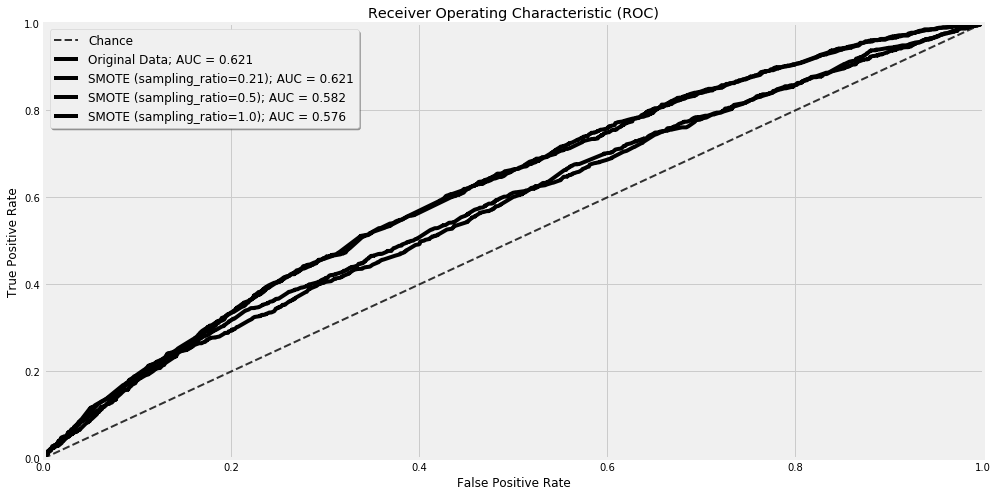

In [697]:
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import ADASYN

fig, ax = plt.subplots(1, 1, figsize=(15, 8), sharey=False)

ax.plot(
    [0, 1], [0, 1], 
    linestyle='--', 
    lw=2, color='k',
    label='Chance', alpha=.8
)

# Original Data

y_test, y_test_pred_proba = sample_and_predict(x_train, y_train, x_test, y_test, sampler=None)

plot_roc_curve(
    y_test, y_test_pred_proba, 
    label=f'Original Data',
    ax=ax
) 


# SMOTE 

for sampling_ratio in [0.21, 0.5, 1.0]:
    smote = SMOTE(k_neighbors=5, sampling_strategy=sampling_ratio, random_state=42)

    y_test, y_test_pred_proba = sample_and_predict(x_train, y_train, x_test, y_test, sampler=smote)

    plot_roc_curve(
        y_test, y_test_pred_proba, 
        label=f'SMOTE (sampling_ratio={sampling_ratio})',
        ax=ax
    ) 



ax.set_title(f'Receiver Operating Characteristic (ROC)')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

ax.legend(ncol=1, fontsize='large', shadow=True)

fig.show()

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:49: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


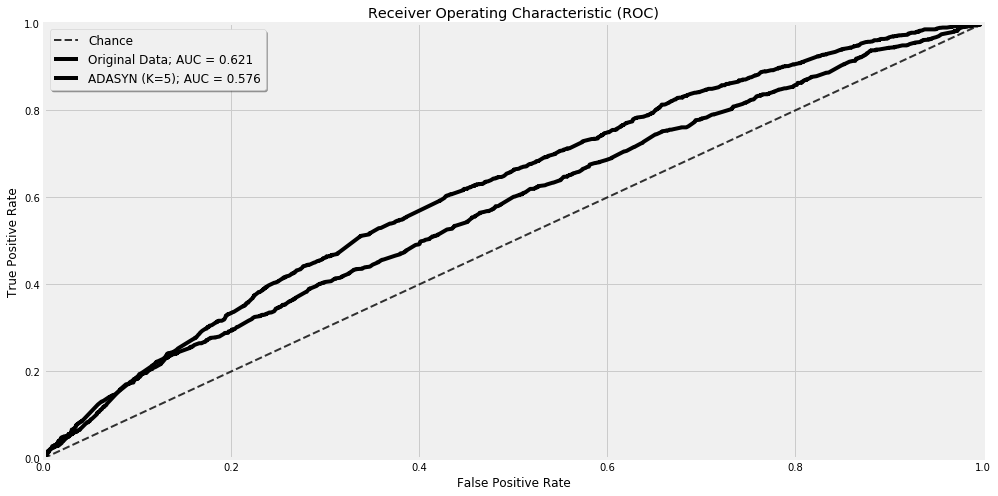

In [698]:
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import ADASYN

fig, ax = plt.subplots(1, 1, figsize=(15, 8), sharey=False)

ax.plot(
    [0, 1], [0, 1], 
    linestyle='--', 
    lw=2, color='k',
    label='Chance', alpha=.8
)

# Original Data

y_test, y_test_pred_proba = sample_and_predict(x_train, y_train, x_test, y_test, sampler=None)

plot_roc_curve(
    y_test, y_test_pred_proba, 
    label=f'Original Data',
    ax=ax
) 


# ADASYN 

for k in [5]:
    adasyn = ADASYN(n_neighbors=5, random_state=0)

    y_test, y_test_pred_proba = sample_and_predict(x_train, y_train, x_test, y_test, sampler=smote)

    plot_roc_curve(
        y_test, y_test_pred_proba, 
        label=f'ADASYN (K={k})',
        ax=ax
    ) 



ax.set_title(f'Receiver Operating Characteristic (ROC)')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

ax.legend(ncol=1, fontsize='large', shadow=True)

fig.show()

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:70: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


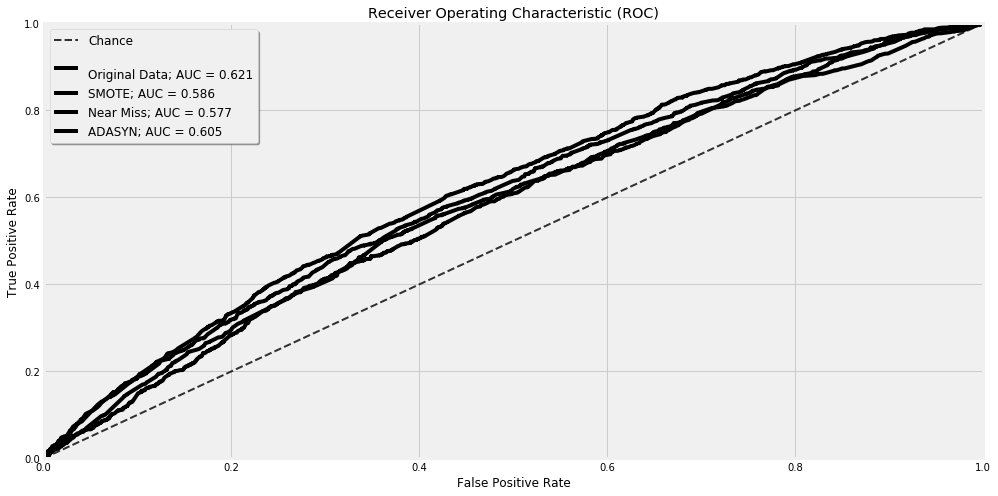

In [686]:
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import ADASYN

fig, ax = plt.subplots(1, 1, figsize=(15, 8), sharey=False)

ax.plot(
    [0, 1], [0, 1], 
    linestyle='--', 
    lw=2, color='k',
    label='Chance', alpha=.8
)

# Original Data

y_test, y_test_pred_proba = sample_and_predict(x_train, y_train, x_test, y_test, sampler=None)

plot_roc_curve(
    y_test, y_test_pred_proba, 
    label=f'\nOriginal Data',
    ax=ax
) 


# SMOTE 

smote = SMOTE(k_neighbors=7, random_state=0)

y_test, y_test_pred_proba = sample_and_predict(x_train, y_train, x_test, y_test, sampler=smote)

plot_roc_curve(
    y_test, y_test_pred_proba, 
    label=f'SMOTE',
    ax=ax
) 

# Near Miss

nm = NearMiss(n_neighbors=7)

y_test, y_test_pred_proba = sample_and_predict(x_train, y_train, x_test, y_test, sampler=nm)

plot_roc_curve(
    y_test, y_test_pred_proba, 
    label=f'Near Miss',
    ax=ax
)

# ADASYN

adasyn = ADASYN(n_neighbors=7, random_state=0)

y_test, y_test_pred_proba = sample_and_predict(x_train, y_train, x_test, y_test, sampler=adasyn)

plot_roc_curve(
    y_test, y_test_pred_proba, 
    label=f'ADASYN',
    ax=ax
)

ax.set_title(f'Receiver Operating Characteristic (ROC)')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

ax.legend(ncol=1, fontsize='large', shadow=True)

fig.show()

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:55: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


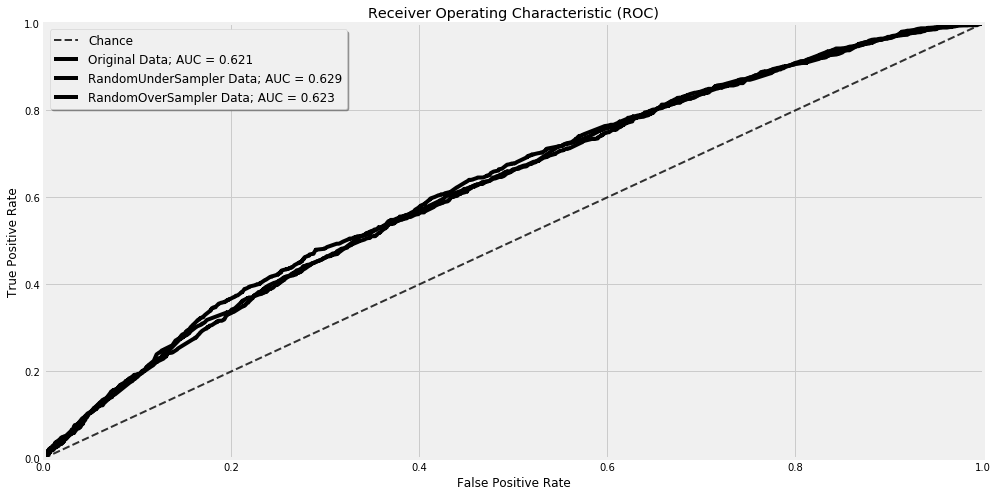

In [699]:
from sklearn.metrics import roc_curve, auc
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

fig, ax = plt.subplots(1, 1, figsize=(15, 8), sharey=False)

ax.plot(
    [0, 1], [0, 1], 
    linestyle='--', 
    lw=2, color='k',
    label='Chance', alpha=.8
)

# Original Data

y_test, y_test_pred_proba = sample_and_predict(x_train, y_train, x_test, y_test, sampler=None)

plot_roc_curve(
    y_test, y_test_pred_proba, 
    label=f'Original Data',
    ax=ax
) 

# Random Under Sampler

rus = RandomUnderSampler(random_state=0)

y_test, y_test_pred_proba = sample_and_predict(x_train, y_train, x_test, y_test, sampler=rus)

plot_roc_curve(
    y_test, y_test_pred_proba, 
    label=f'RandomUnderSampler Data',
    ax=ax
) 


# Random Over Sampler

ros = RandomOverSampler(random_state=0)

y_test, y_test_pred_proba = sample_and_predict(x_train, y_train, x_test, y_test, sampler=ros)

plot_roc_curve(
    y_test, y_test_pred_proba, 
    label=f'RandomOverSampler Data',
    ax=ax
) 

ax.set_title(f'Receiver Operating Characteristic (ROC)')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

ax.legend(ncol=1, fontsize='large', shadow=True)

fig.show()

# Ensembles 

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


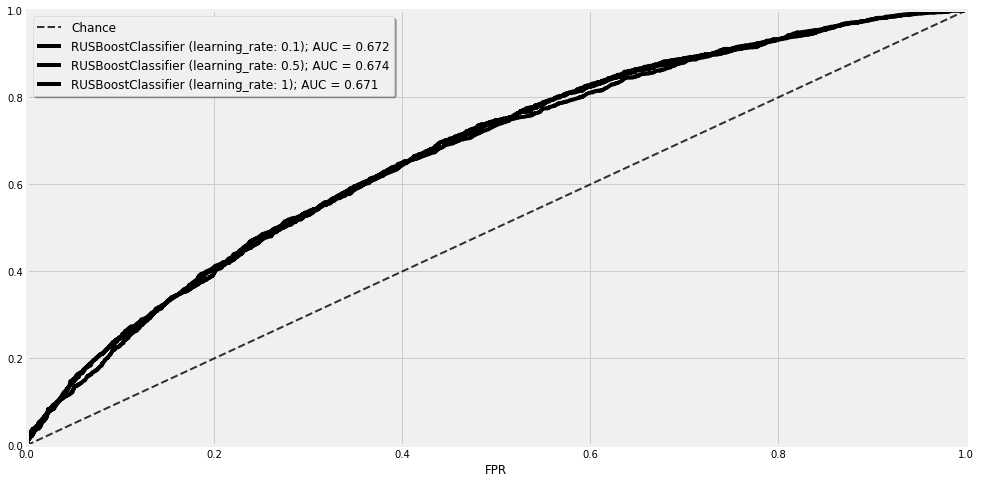

In [693]:
from imblearn.ensemble import RUSBoostClassifier

fig, ax = plt.subplots(1, 1, figsize=(15, 8), sharey=False)

ax.plot(
    [0, 1], [0, 1], 
    linestyle='--', 
    lw=2, color='k',
    label='Chance', alpha=.8
)

# RUSBoostClassifier

for learning_rate in [0.1, 0.5, 1]:
    
    clf = RUSBoostClassifier(n_estimators=200, learning_rate=learning_rate, random_state=42)
    clf.fit(x_train, y_train)
    y_test_pred_proba = clf.predict_proba(x_test)[:,1]

    plot_roc_curve(
        y_test, y_test_pred_proba, 
        label=f'RUSBoostClassifier (learning_rate: {learning_rate})',
        ax=ax
    ) 

ax.legend(ncol=1, fontsize='large', shadow=True)

ax.set_title(f'Receiver Operating Characteristic (ROC)')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

fig.show()

In [751]:
from imblearn.ensemble import BalancedBaggingClassifier

bbc = BalancedBaggingClassifier(random_state=42)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:43: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


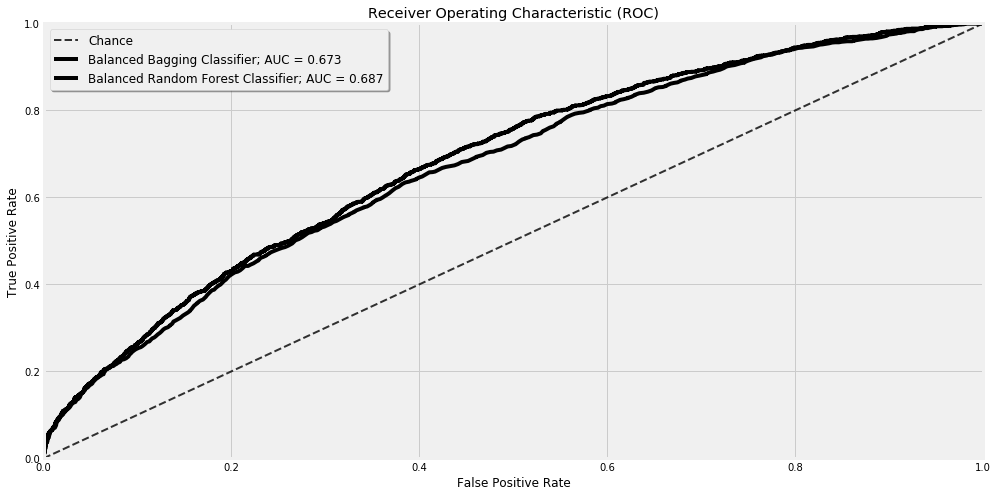

In [755]:
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier

fig, ax = plt.subplots(1, 1, figsize=(15, 8), sharey=False)

ax.plot(
    [0, 1], [0, 1], 
    linestyle='--', 
    lw=2, color='k',
    label='Chance', alpha=.8
)

# BalancedBaggingClassifier

clf = BalancedBaggingClassifier(n_estimators=500, n_jobs=-1, random_state=42)
clf.fit(x_train, y_train)
y_test_pred_proba = clf.predict_proba(x_test)[:,1]

plot_roc_curve(
    y_test, y_test_pred_proba, 
    label='Balanced Bagging Classifier',
    ax=ax
) 

# BalancedRandomForestClassifier
    
clf = BalancedRandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
clf.fit(x_train, y_train)
y_test_pred_proba = clf.predict_proba(x_test)[:,1]

plot_roc_curve(
    y_test, y_test_pred_proba, 
    label='Balanced Random Forest Classifier',
    ax=ax
) 

ax.legend(ncol=1, fontsize='large', shadow=True)

ax.set_title(f'Receiver Operating Characteristic (ROC)')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

fig.show()

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


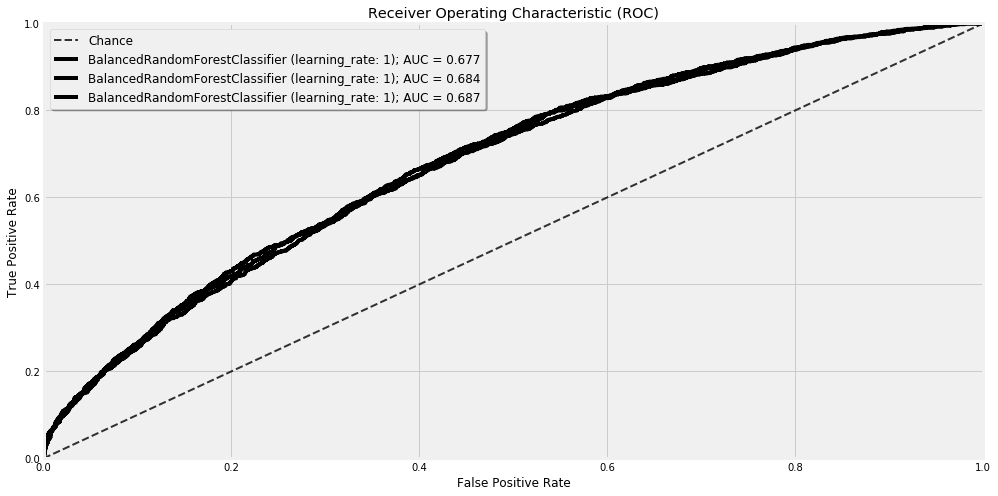

In [754]:
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier

fig, ax = plt.subplots(1, 1, figsize=(15, 8), sharey=False)

ax.plot(
    [0, 1], [0, 1], 
    linestyle='--', 
    lw=2, color='k',
    label='Chance', alpha=.8
)

# BalancedRandomForestClassifier

for n_estimators in [50, 100, 500]:
    
    clf = BalancedRandomForestClassifier(n_estimators=n_estimators, n_jobs=-1, random_state=42)
    clf.fit(x_train, y_train)
    y_test_pred_proba = clf.predict_proba(x_test)[:,1]

    plot_roc_curve(
        y_test, y_test_pred_proba, 
        label=f'BalancedRandomForestClassifier (learning_rate: {learning_rate})',
        ax=ax
    ) 

ax.set_title('Receiver Operating Characteristic (ROC)')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

ax.legend(ncol=1, fontsize='large', shadow=True)

fig.show()

In [690]:
y_train.mean() / (1 - y_train.mean())

0.202528597230584

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


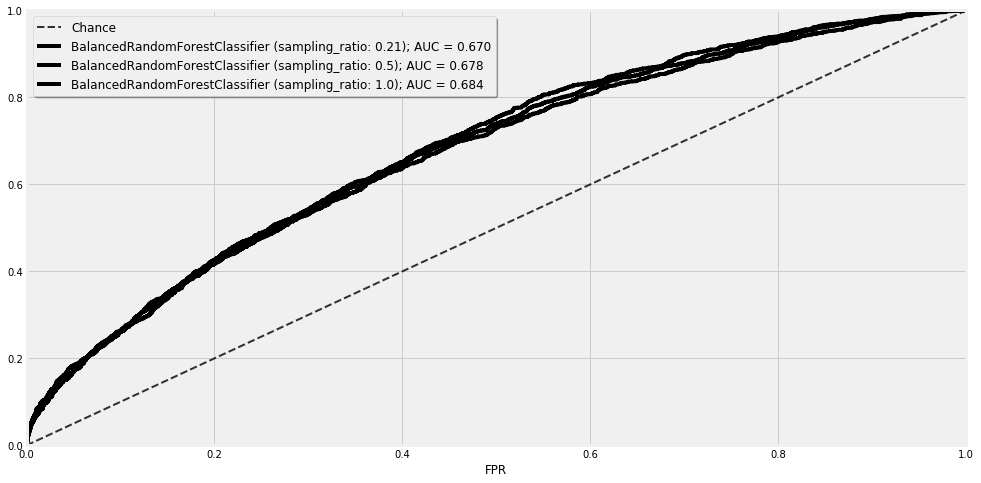

In [691]:
from imblearn.ensemble import BalancedRandomForestClassifier

fig, ax = plt.subplots(1, 1, figsize=(15, 8), sharey=False)

ax.plot(
    [0, 1], [0, 1], 
    linestyle='--', 
    lw=2, color='k',
    label='Chance', alpha=.8
)

# BalancedRandomForestClassifier

for sampling_ratio in [0.21, 0.5, 1.0]:
    
    clf = BalancedRandomForestClassifier(n_estimators=100, sampling_strategy=sampling_ratio, n_jobs=-1, random_state=42)
    clf.fit(x_train, y_train)
    y_test_pred_proba = clf.predict_proba(x_test)[:,1]

    plot_roc_curve(
        y_test, y_test_pred_proba, 
        label=f'BalancedRandomForestClassifier (sampling_ratio: {sampling_ratio})',
        ax=ax
    ) 

ax.legend(ncol=1, fontsize='large', shadow=True)

fig.show()

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


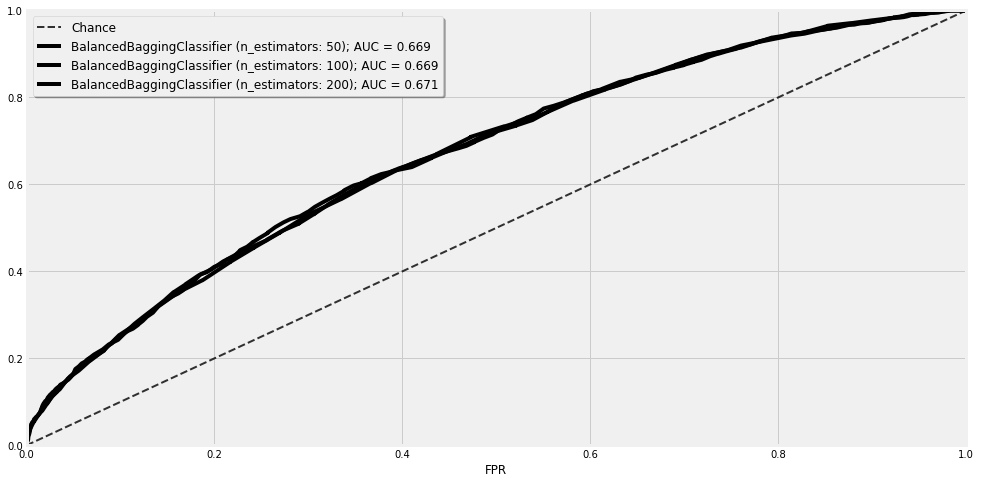

In [692]:
from imblearn.ensemble import BalancedBaggingClassifier

fig, ax = plt.subplots(1, 1, figsize=(15, 8), sharey=False)

ax.plot(
    [0, 1], [0, 1], 
    linestyle='--', 
    lw=2, color='k',
    label='Chance', alpha=.8
)

# RUSBoostClassifier

for n_estimators in [50, 100, 200]:
    
    clf = BalancedBaggingClassifier(n_estimators=n_estimators, n_jobs=-1, random_state=42)
    clf.fit(x_train, y_train)
    y_test_pred_proba = clf.predict_proba(x_test)[:,1]

    plot_roc_curve(
        y_test, y_test_pred_proba, 
        label=f'BalancedBaggingClassifier (n_estimators: {n_estimators})',
        ax=ax
    ) 

ax.legend(ncol=1, fontsize='large', shadow=True)

fig.show()

# Equal Opportunity Score

In [47]:
df_engineers = pd.DataFrame(
    {
        'IQ': [110, 120, 124, 123, 112, 114],
        'Gender': ['M', 'F', 'M', 'F', 'M', 'F'],
        'Is Hired? (True Label)': [0, 1, 1, 1, 1, 0],
        'Is Hired? (Predicted Label)': [1, 0, 1, 1, 1, 0],
    }
)

In [48]:
df_engineers

,IQ,Gender,Is Hired? (True Label),Is Hired? (Predicted Label)
0,110,M,0,1
1,120,F,1,0
2,124,M,1,1
3,123,F,1,1
4,112,M,1,1
5,114,F,0,0


In [49]:
equal_opportunity = df_engineers[ 
    (
        df_engineers['Is Hired? (True Label)'] == 1
    ) & (
        df_engineers['Gender'] == 'F'
    )
]['Is Hired? (Predicted Label)'].mean() / df_engineers[ 
    (
        df_engineers['Is Hired? (True Label)'] == 1
    ) & (
        df_engineers['Gender'] != 'F'
    )
]['Is Hired? (Predicted Label)'].mean()

In [50]:
equal_opportunity = df_engineers[ 
    (
        df_engineers['Is Hired? (True Label)'] == 1
    ) & (
        df_engineers['Gender'] == 'M'
    )
]['Is Hired? (Predicted Label)'].mean() / df_engineers[ 
    (
        df_engineers['Is Hired? (True Label)'] == 1
    ) & (
        df_engineers['Gender'] != 'M'
    )
]['Is Hired? (Predicted Label)'].mean()

In [51]:
def equal_opportunity_score(df, true_label, predicted_label, feature_name, feature_value):
    opportunity_to_value = df[
        (df[true_label] == 1) & (df[feature_name] == feature_value)
    ][predicted_label].mean() / df[
        (df[true_label] == 1) & (df[feature_name] != feature_value)
    ][predicted_label].mean()
    opportunity_to_other_values = 1 / opportunity_to_value
    better_opportunity_to_value = opportunity_to_value > opportunity_to_other_values
    return {
        'Score': min(opportunity_to_value, opportunity_to_other_values),
        f'Better Opprtunity to {feature_value}': better_opportunity_to_value
    }


In [52]:
equal_opportunity_score(
    df=df_engineers, 
    true_label='Is Hired? (True Label)', 
    predicted_label='Is Hired? (Predicted Label)', 
    feature_name='Gender',
    feature_value='F'
)

{'Score': 0.5, 'Better Opprtunity to F': False}